# MIE1624 Introduction to Data Science and Analytics

## Assignment#1 KaggleSalary DayaSet Analysis

## Zhaohui Qu - 1005783127

In [129]:
#!pip3 install numpy
#!pip3 install pandas
#!pip3 install scikit-learn
#!pip3 install matplotlib
#!pip3 install seaborn

In [130]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import make_scorer, confusion_matrix
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt
import seaborn as sns
import sys
from sklearn.metrics import mean_squared_error, r2_score,confusion_matrix,classification_report

sns.set_style('whitegrid')
pd.pandas.set_option('display.max_columns', None) 
# The following line is needed to show plots inline in notebooks
%matplotlib inline 

In [131]:
train = pd.read_csv('/Users/qzh/Documents/UT/1624_Data_Analysis/assignment1/Kaggle_Salary.csv')

In [132]:
train.head()

,Time from Start to Finish (seconds),Q1,Q2,Q2_OTHER_TEXT,Q3,Q4,Q5,Q5_OTHER_TEXT,Q6,Q7,Q8,Q9_Part_1,Q9_Part_2,Q9_Part_3,Q9_Part_4,Q9_Part_5,Q9_Part_6,Q9_Part_7,Q9_Part_8,Q9_OTHER_TEXT,Q10,Q11,Q12_Part_1,Q12_Part_2,Q12_Part_3,Q12_Part_4,Q12_Part_5,Q12_Part_6,Q12_Part_7,Q12_Part_8,Q12_Part_9,Q12_Part_10,Q12_Part_11,Q12_Part_12,Q12_OTHER_TEXT,Q13_Part_1,Q13_Part_2,Q13_Part_3,Q13_Part_4,Q13_Part_5,Q13_Part_6,Q13_Part_7,Q13_Part_8,Q13_Part_9,Q13_Part_10,Q13_Part_11,Q13_Part_12,Q13_OTHER_TEXT,Q14,Q14_Part_1_TEXT,Q14_Part_2_TEXT,Q14_Part_3_TEXT,Q14_Part_4_TEXT,Q14_Part_5_TEXT,Q14_OTHER_TEXT,Q15,Q16_Part_1,Q16_Part_2,Q16_Part_3,Q16_Part_4,Q16_Part_5,Q16_Part_6,Q16_Part_7,Q16_Part_8,Q16_Part_9,Q16_Part_10,Q16_Part_11,Q16_Part_12,Q16_OTHER_TEXT,Q17_Part_1,Q17_Part_2,Q17_Part_3,Q17_Part_4,Q17_Part_5,Q17_Part_6,Q17_Part_7,Q17_Part_8,Q17_Part_9,Q17_Part_10,Q17_Part_11,Q17_Part_12,Q17_OTHER_TEXT,Q18_Part_1,Q18_Part_2,Q18_Part_3,Q18_Part_4,Q18_Part_5,Q18_Part_6,Q18_Part_7,Q18_Part_8,Q18_Part_9,Q18_Part_10,Q18_Part_11,Q18_Part_12,Q18_OTHER_TEXT,Q19,Q19_OTHER_TEXT,Q20_Part_1,Q20_Part_2,Q20_Part_3,Q20_Part_4,Q20_Part_5,Q20_Part_6,Q20_Part_7,Q20_Part_8,Q20_Part_9,Q20_Part_10,Q20_Part_11,Q20_Part_12,Q20_OTHER_TEXT,Q21_Part_1,Q21_Part_2,Q21_Part_3,Q21_Part_4,Q21_Part_5,Q21_OTHER_TEXT,Q22,Q23,Q24_Part_1,Q24_Part_2,Q24_Part_3,Q24_Part_4,Q24_Part_5,Q24_Part_6,Q24_Part_7,Q24_Part_8,Q24_Part_9,Q24_Part_10,Q24_Part_11,Q24_Part_12,Q24_OTHER_TEXT,Q25_Part_1,Q25_Part_2,Q25_Part_3,Q25_Part_4,Q25_Part_5,Q25_Part_6,Q25_Part_7,Q25_Part_8,Q25_OTHER_TEXT,Q26_Part_1,Q26_Part_2,Q26_Part_3,Q26_Part_4,Q26_Part_5,Q26_Part_6,Q26_Part_7,Q26_OTHER_TEXT,Q27_Part_1,Q27_Part_2,Q27_Part_3,Q27_Part_4,Q27_Part_5,Q27_Part_6,Q27_OTHER_TEXT,Q28_Part_1,Q28_Part_2,Q28_Part_3,Q28_Part_4,Q28_Part_5,Q28_Part_6,Q28_Part_7,Q28_Part_8,Q28_Part_9,Q28_Part_10,Q28_Part_11,Q28_Part_12,Q28_OTHER_TEXT,Q29_Part_1,Q29_Part_2,Q29_Part_3,Q29_Part_4,Q29_Part_5,Q29_Part_6,Q29_Part_7,Q29_Part_8,Q29_Part_9,Q29_Part_10,Q29_Part_11,Q29_Part_12,Q29_OTHER_TEXT,Q30_Part_1,Q30_Part_2,Q30_Part_3,Q30_Part_4,Q30_Part_5,Q30_Part_6,Q30_Part_7,Q30_Part_8,Q30_Part_9,Q30_Part_10,Q30_Part_11,Q30_Part_12,Q30_OTHER_TEXT,Q31_Part_1,Q31_Part_2,Q31_Part_3,Q31_Part_4,Q31_Part_5,Q31_Part_6,Q31_Part_7,Q31_Part_8,Q31_Part_9,Q31_Part_10,Q31_Part_11,Q31_Part_12,Q31_OTHER_TEXT,Q32_Part_1,Q32_Part_2,Q32_Part_3,Q32_Part_4,Q32_Part_5,Q32_Part_6,Q32_Part_7,Q32_Part_8,Q32_Part_9,Q32_Part_10,Q32_Part_11,Q32_Part_12,Q32_OTHER_TEXT,Q33_Part_1,Q33_Part_2,Q33_Part_3,Q33_Part_4,Q33_Part_5,Q33_Part_6,Q33_Part_7,Q33_Part_8,Q33_Part_9,Q33_Part_10,Q33_Part_11,Q33_Part_12,Q33_OTHER_TEXT,Q34_Part_1,Q34_Part_2,Q34_Part_3,Q34_Part_4,Q34_Part_5,Q34_Part_6,Q34_Part_7,Q34_Part_8,Q34_Part_9,Q34_Part_10,Q34_Part_11,Q34_Part_12,Q34_OTHER_TEXT,Q10_Encoded,Q10_buckets
0,510,22-24,Male,-1,France,Master’s degree,Software Engineer,-1,"1000-9,999 employees",0,I do not know,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1,"30,000-39,999",$0 (USD),Twitter (data science influencers),NaN,NaN,"Kaggle (forums, blog, social media, etc)",NaN,NaN,NaN,"Blogs (Towards Data Science, Medium, Analytics...",Journal Publications (traditional publications...,NaN,NaN,NaN,-1,NaN,Coursera,NaN,DataCamp,NaN,Kaggle Courses (i.e. Kaggle Learn),NaN,Udemy,NaN,NaN,NaN,NaN,-1,"Basic statistical software (Microsoft Excel, G...",0,-1,-1,-1,-1,-1,1-2 years,"Jupyter (JupyterLab, Jupyter Notebooks, etc)",RStudio,PyCharm,NaN,MATLAB,NaN,Spyder,NaN,NaN,NaN,NaN,NaN,-1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN,-1,Python,R,SQL,NaN,NaN,Java,Javascript,NaN,NaN,MATLAB,NaN,NaN,-1,Python,-1,NaN,Matplotlib,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1,CPUs,GPUs,NaN,NaN,NaN,-1,Never,1-2 years,Linear or Logistic Regression,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN,-1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1,NaN,NaN,NaN,NaN,NaN,NaN,-1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN,-1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1,N

In [133]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12497 entries, 0 to 12496
Columns: 248 entries, Time from Start to Finish (seconds) to Q10_buckets
dtypes: int64(30), object(218)
memory usage: 23.6+ MB


## S1. Data Cleaning

### S1.1 Missing Data

In [134]:
column_headers = list(train.columns.values)

Calculate the number of missing value of non-multiple choice

In [135]:
L1=[]
L2=[]
for col in train.columns:
    if ("Part" not in col) and ("OTHER" not in col )and("Time" not in col):
        L1.append(col)
    else :
        if ("Part" not in col) and ("Time" not in col):
            L2.append(col)      

In [136]:
total_1 = train.isnull().sum().sort_values(ascending=False)
percent_1 = (train.isnull().sum()/train.isnull().count()).sort_values(ascending=False)
missing_data_1 = pd.concat([total_1, percent_1], axis=1, keys=['Total', 'Percent'])
#missing_data.head(25)
L1_null=missing_data_1.loc[ L1, : ]
#L1_null.sort_values(by='Percent', ascending=False)
L1_null.sort_values(by="Total" , ascending=False)

,Total,Percent
Q23,1956,0.156518
Q22,1947,0.155797
Q19,1844,0.147555
Q15,1075,0.086021
Q14,1045,0.083620
Q11,247,0.019765
Q1,0,0.000000
Q10_Encoded,0,0.000000
Q10,0,0.000000
Q2,0,0.000000


In [137]:
Q_missing=L1_null[L1_null['Total'] > 246]._stat_axis.values.tolist()

Calculate the number of missing value of multiple choice

In [138]:
#L2=np.array(['Q2_OTHER_TEXT','Q5_OTHER_TEXT','Q9_OTHER_TEXT','Q12_OTHER_TEXT','Q13_OTHER_TEXT','Q14_OTHER_TEXT','Q16_OTHER_TEXT','Q17_OTHER_TEXT','Q18_OTHER_TEXT','Q19_OTHER_TEXT','Q20_OTHER_TEXT','Q21_OTHER_TEXT','Q24_OTHER_TEXT','Q25_OTHER_TEXT','Q26_OTHER_TEXT','Q27_OTHER_TEXT','Q28_OTHER_TEXT','Q29_OTHER_TEXT','Q30_OTHER_TEXT','Q31_OTHER_TEXT','Q32_OTHER_TEXT','Q33_OTHER_TEXT','Q34_OTHER_TEXT'])
L2_null=missing_data_1.loc[ L2, : ]
L2_null.sort_values(by="Total" , ascending=False)

,Total,Percent
Q2_OTHER_TEXT,0,0.0
Q24_OTHER_TEXT,0,0.0
Q33_OTHER_TEXT,0,0.0
Q32_OTHER_TEXT,0,0.0
Q31_OTHER_TEXT,0,0.0
Q30_OTHER_TEXT,0,0.0
Q29_OTHER_TEXT,0,0.0
Q28_OTHER_TEXT,0,0.0
Q27_OTHER_TEXT,0,0.0
Q26_OTHER_TEXT,0,0.0


From above two tables, We can see that percentages of missing data are all under 16%. To avoid introducing artificial noise into the dataset, we use the mode of each salary bucket to fill the missing value.

In [139]:
def get_mode(Q): ##return mode of Question in different salary range
    Q10_class=train.Q10_buckets.unique() 
    dic = dict()
    for classes in  Q10_class:
        t=train[train['Q10_buckets']==classes]
        mode_n=t[Q].mode()[0]
        dic.setdefault(classes,mode_n)
    return dic

In [140]:
Q10_class=train.Q10_buckets.unique()
for Q in Q_missing:
    diction=get_mode(Q)
    for classes in Q10_class:
        if train[(train[Q].isnull()) & (train['Q10_buckets']==classes)].shape[0]>0:
            train.at[(train[Q].isnull()) & (train['Q10_buckets']==classes), Q] = diction[classes]


### S1.2 Encode general categorical features

For general categorical features, since there is not any ordered relationship between the values in these categories, We can encode these categorical values using dummy variables.I look through all the questions and pick 5 questions that can be converted into dummy variable. Then each category for each feature becomes a new column. These questions are:  
**Q2**:What is your gender?  
**Q3**: In which country do you currently reside?
**Q5**:Select the title most similar to your current role (or most recent title if retired):   
**Q14**:What is the primary tool that you use at work or school to analyze data?  
**Q19**:What programming language would you recommend an aspiring data scientist to learn first?  
**Q8**:Does your current employer incorporate machine learning methods into their business?


In [141]:
DummyColumns = ['Q2','Q5','Q14','Q19','Q8','Q3']
for col in DummyColumns:
    train= pd.get_dummies(data=train, columns=[col])


In [142]:
features_to_drop = ['Q2_OTHER_TEXT','Q5_OTHER_TEXT','Q14_Part_1_TEXT','Q14_Part_2_TEXT',\
                    'Q14_Part_3_TEXT','Q14_Part_4_TEXT','Q14_Part_5_TEXT','Q14_OTHER_TEXT','Q19_OTHER_TEXT']
train.drop(labels=features_to_drop, axis=1, inplace=True)


### S1.3 Encode binary categorical features

The original dataset has converted some question into dummmy variable like Which of the following hosted notebook products do you use on a regular basis?  (Select all that apply) - Selected Choice -  IBM Watson Studio. Each column is a yes-or-no question. For these binary features, I label yes as '1' and NAN as '0'.

In [143]:
import math
def Binarize(value):
    if isinstance(value,str):
        return 1
    else:
        if value == 0 or math.isnan(value):
            return 0
        else:
            return 1

In [144]:
selected=[]
Other_text=[]
for col in train.columns:
    if ("Part" in col):
        selected.append(col)
        
for col in selected:
    train[col] = train[col].apply(Binarize)
    
for col in train.columns:
    if ("OTHER"  in col):
        Other_text.append(col)    

train.drop(labels=Other_text, axis=1, inplace=True)

### S1.4 Encode special categorical features

There are some special categorial features that the value is a range like "22-24" in Question 1 "What is your age?". These values have an ordered relationship, so I can not use one-hot to encode the features, otherwise the feature may lose some information inside. Therefore I normalize each value with mean value, like 23. There are eight special features:  
**Q1**:What is your age (# years)?  
**Q4**:What is the highest level of formal education that you have attained or plan to attain within the next 2 years?  
**Q6**:What is the size of the company where you are employed?  
**Q7**:Approximately how many individuals are responsible for data science workloads at your place of business?  
**Q11**:Approximately how much money have you spent on machine learning and/or cloud computing products at your work in the past 5 years?  
**Q15**:How long have you been writing code to analyze data (at work or at school)?  
**Q22**:Have you ever used a TPU (tensor processing unit)?  
**Q23**:For how many years have you used machine learning methods?  

In [145]:
def Normalize(value):
    if isinstance(value, str):
        if '-' in value:
            temp = value.split('-')
            return int((float(temp[0])+float(temp[1]))/2)
        if '+' in value:
            a = value.split('+')
            return float(a[0])
        if '>' in value:
            b=value.split('>')
            return float(a[0])
        if '<' in value:
            s=value.split('<')
            return (0+float(s[1]))/2
        else:
            return value
    else:
        return value

Q1: What is your age (# years)? 

In [147]:
train.Q1.unique() 

array(['22-24', '40-44', '50-54', '55-59', '30-34', '18-21', '35-39',
       '25-29', '45-49', '60-69', '70+'], dtype=object)

In [148]:
train['Q1_age'] = train['Q1'].apply(Normalize)
train.drop(labels='Q1', axis=1, inplace=True)

Q4: What is the highest level of formal education that you have attained or plan to attain within the next 2 years?  

In [149]:
education_encode = {   
    'I prefer not to answer': 0,
    'No formal education past high school': 1,
    'Some college/university study without earning a bachelor’s degree': 3, 
    'Professional degree': 2,
    'Bachelor’s degree': 4,
    'Master’s degree': 5, 
    'Doctoral degree': 6,
    }

In [150]:
train.loc[0:,'Q4_education'] = train.loc[0:,'Q4'].map(education_encode)
train.loc[0:,'Q4_education']=train.loc[0:,'Q4_education'].astype(int)
train.drop(labels='Q4', axis=1, inplace=True)

Q6: What is the size of the company where you are employed?  

In [151]:
companysize_encode = {   
    '0-49 employees': 25,
    '50-249 employees': 150,
    '250-999 employees': 625, 
    '1000-9,999 employees': 5500,
    '> 10,000 employees': 10000,
    }

In [152]:
train.loc[0:,'Q6_companysize'] = train.loc[0:,'Q6'].map(companysize_encode)
train.loc[0:,'Q6_companysize']=train.loc[0:,'Q6_companysize'].astype(int)
train.drop(labels='Q6', axis=1, inplace=True)

Q7: Approximately how many individuals are responsible for data science workloads at your place of business?

In [153]:
train.Q7.unique() 

array(['0', '20+', '3-4', '1-2', '5-9', '10-14', '15-19'], dtype=object)

In [154]:
train['Q7_groupsize'] = train['Q7'].apply(Normalize)

In [155]:
train.drop(labels='Q7', axis=1, inplace=True)

Q11: Approximately how much money have you spent on machine learning and/or cloud computing products at your work in the past 5 years? 

In [156]:
train.Q11.unique() 

array(['$0 (USD)', '> $100,000 ($USD)', '$10,000-$99,999', '$100-$999',
       '$1000-$9,999', '$1-$99'], dtype=object)

In [157]:
moneyonML_encode= {   
    '$0 (USD)': 0,
    '$1-$99': 50,
    '$100-$999': 500, 
    '$1000-$9,999': 5000,
    '$10,000-$99,999': 55000, 
    '> $100,000 ($USD)': 100000,
    }

In [158]:
train.loc[0:,'Q11_moneyonML'] = train.loc[0:,'Q11'].map(moneyonML_encode)
train.loc[0:,'Q11_moneyonML']=train.loc[0:,'Q11_moneyonML'].astype(int)
train.drop(labels='Q11', axis=1, inplace=True)

Q15:How long have you been writing code to analyze data (at work or at school)?  

In [159]:
train.Q15.unique()

array(['1-2 years', 'I have never written code', '< 1 years', '20+ years',
       '3-5 years', '5-10 years', '10-20 years'], dtype=object)

In [160]:
timeoncode_encode= {   
    'I have never written code': 0,
    '< 1 years': 0.5,
    '1-2 years': 1.5, 
    '3-5 years':4,
    '5-10 years':7.5, 
    '10-20 years': 15,
    '20+ years':20
    }
train.loc[0:,'Q15_timeoncode'] = train.loc[0:,'Q15'].map(timeoncode_encode)
train.loc[0:,'Q15_timeoncode']=train.loc[0:,'Q15_timeoncode'].astype(int)
train.drop(labels='Q15', axis=1, inplace=True)

Q22:Have you ever used a TPU (tensor processing unit)?  

In [161]:
train.Q22.unique()

array(['Never', 'Once', '6-24 times', '2-5 times', '> 25 times'],
      dtype=object)

In [162]:
TPU_encode= {   
    'Never': 0,
    'Once': 1,
    '6-24 times': 15, 
    '2-5 times':4,
    '5-10 years':8, 
    '> 25 times': 25,
    }
train.loc[0:,'Q22_TPU'] = train.loc[0:,'Q22'].map(TPU_encode)
train.loc[0:,'Q22_TPU']=train.loc[0:,'Q22_TPU'].astype(int)
train.drop(labels='Q22', axis=1, inplace=True)

Q23: For how many years have you used machine learning methods?  

In [163]:
train.Q23.unique()

array(['1-2 years', '< 1 years', '2-3 years', '10-15 years', '3-4 years',
       '4-5 years', '5-10 years', '20+ years'], dtype=object)

In [164]:
timeonML_encode= {   
    '< 1 years': 0.5,
    '1-2 years': 1.5,
    '2-3 years': 2.5, 
    '3-4 years':3.5,
    '4-5 years':4.5, 
    '5-10 years': 7.5,
    '10-15 years':12.5,
    '20+ years':20,
    }
train.loc[0:,'Q23_timeonML'] = train.loc[0:,'Q23'].map(timeonML_encode)
train.loc[0:,'Q23_timeonML']=train.loc[0:,'Q23_timeonML'].astype(int)
train.drop(labels='Q23', axis=1, inplace=True)

In [165]:
train

,Time from Start to Finish (seconds),Q9_Part_1,Q9_Part_2,Q9_Part_3,Q9_Part_4,Q9_Part_5,Q9_Part_6,Q9_Part_7,Q9_Part_8,Q10,Q12_Part_1,Q12_Part_2,Q12_Part_3,Q12_Part_4,Q12_Part_5,Q12_Part_6,Q12_Part_7,Q12_Part_8,Q12_Part_9,Q12_Part_10,Q12_Part_11,Q12_Part_12,Q13_Part_1,Q13_Part_2,Q13_Part_3,Q13_Part_4,Q13_Part_5,Q13_Part_6,Q13_Part_7,Q13_Part_8,Q13_Part_9,Q13_Part_10,Q13_Part_11,Q13_Part_12,Q16_Part_1,Q16_Part_2,Q16_Part_3,Q16_Part_4,Q16_Part_5,Q16_Part_6,Q16_Part_7,Q16_Part_8,Q16_Part_9,Q16_Part_10,Q16_Part_11,Q16_Part_12,Q17_Part_1,Q17_Part_2,Q17_Part_3,Q17_Part_4,Q17_Part_5,Q17_Part_6,Q17_Part_7,Q17_Part_8,Q17_Part_9,Q17_Part_10,Q17_Part_11,Q17_Part_12,Q18_Part_1,Q18_Part_2,Q18_Part_3,Q18_Part_4,Q18_Part_5,Q18_Part_6,Q18_Part_7,Q18_Part_8,Q18_Part_9,Q18_Part_10,Q18_Part_11,Q18_Part_12,Q20_Part_1,Q20_Part_2,Q20_Part_3,Q20_Part_4,Q20_Part_5,Q20_Part_6,Q20_Part_7,Q20_Part_8,Q20_Part_9,Q20_Part_10,Q20_Part_11,Q20_Part_12,Q21_Part_1,Q21_Part_2,Q21_Part_3,Q21_Part_4,Q21_Part_5,Q24_Part_1,Q24_Part_2,Q24_Part_3,Q24_Part_4,Q24_Part_5,Q24_Part_6,Q24_Part_7,Q24_Part_8,Q24_Part_9,Q24_Part_10,Q24_Part_11,Q24_Part_12,Q25_Part_1,Q25_Part_2,Q25_Part_3,Q25_Part_4,Q25_Part_5,Q25_Part_6,Q25_Part_7,Q25_Part_8,Q26_Part_1,Q26_Part_2,Q26_Part_3,Q26_Part_4,Q26_Part_5,Q26_Part_6,Q26_Part_7,Q27_Part_1,Q27_Part_2,Q27_Part_3,Q27_Part_4,Q27_Part_5,Q27_Part_6,Q28_Part_1,Q28_Part_2,Q28_Part_3,Q28_Part_4,Q28_Part_5,Q28_Part_6,Q28_Part_7,Q28_Part_8,Q28_Part_9,Q28_Part_10,Q28_Part_11,Q28_Part_12,Q29_Part_1,Q29_Part_2,Q29_Part_3,Q29_Part_4,Q29_Part_5,Q29_Part_6,Q29_Part_7,Q29_Part_8,Q29_Part_9,Q29_Part_10,Q29_Part_11,Q29_Part_12,Q30_Part_1,Q30_Part_2,Q30_Part_3,Q30_Part_4,Q30_Part_5,Q30_Part_6,Q30_Part_7,Q30_Part_8,Q30_Part_9,Q30_Part_10,Q30_Part_11,Q30_Part_12,Q31_Part_1,Q31_Part_2,Q31_Part_3,Q31_Part_4,Q31_Part_5,Q31_Part_6,Q31_Part_7,Q31_Part_8,Q31_Part_9,Q31_Part_10,Q31_Part_11,Q31_Part_12,Q32_Part_1,Q32_Part_2,Q32_Part_3,Q32_Part_4,Q32_Part_5,Q32_Part_6,Q32_Part_7,Q32_Part_8,Q32_Part_9,Q32_Part_10,Q32_Part_11,Q32_Part_12,Q33_Part_1,Q33_Part_2,Q33_Part_3,Q33_Part_4,Q33_Part_5,Q33_Part_6,Q33_Part_7,Q33_Part_8,Q33_Part_9,Q33_Part_10,Q33_Part_11,Q33_Part_12,Q34_Part_1,Q34_Part_2,Q34_Part_3,Q34_Part_4,Q34_Part_5,Q34_Part_6,Q34_Part_7,Q34_Part_8,Q34_Part_9,Q34_Part_10,Q34_Part_11,Q34_Part_12,Q10_Encoded,Q10_buckets,Q2_Female,Q2_Male,Q2_Prefer not to say,Q2_Prefer to self-describe,Q5_Business Analyst,Q5_DBA/Database Engineer,Q5_Data Analyst,Q5_Data Engineer,Q5_Data Scientist,Q5_Other,Q5_Product/Project Manager,Q5_Research Scientist,Q5_Software Engineer,Q5_Statistician,"Q14_Advanced statistical software (SPSS, SAS, etc.)","Q14_Basic statistical software (Microsoft Excel, Google Sheets, etc.)","Q14_Business intelligence software (Salesforce, Tableau, Spotfire, etc.)","Q14_Cloud-based data software & APIs (AWS, GCP, Azure, etc.)","Q14_Local development environments (RStudio, JupyterLab, etc.)",Q14_Other,Q19_Bash,Q19_C,Q19_C++,Q19_Java,Q19_Javascript,Q19_MATLAB,Q19_None,Q19_Other,Q19_Python,Q19_R,Q19_SQL,Q19_TypeScript,Q8_I do not know,Q8_No (we do not use ML methods),Q8_We are exploring ML methods (and may one day put a model into production),"Q8_We have well established ML methods (i.e., models in production for more than 2 years)","Q8_We recently started using ML methods (i.e., models in production for less than 2 years)",Q8_We use ML methods for generating insights (but do not put working models into production),Q3_Algeria,Q3_Argentina,Q3_Australia,Q3_Austria,Q3_Bangladesh,Q3_Belarus,Q3_Belgium,Q3_Brazil,Q3_Canada,Q3_Chile,Q3_China,Q3_Colombia,Q3_Czech Republic,Q3_Denmark,Q3_Egypt,Q3_France,Q3_Germany,Q3_Greece,Q3_Hong Kong (S.A.R.),Q3_Hungary,Q3_India,Q3_Indonesia,"Q3_Iran, Islamic Republic of...",Q3_Ireland,Q3_Israel,Q3_Italy,Q3_Japan,Q3_Kenya,Q3_Malaysia,Q3_Mexico,Q3_Morocco,Q3_Netherlands,Q3_New Zealand,Q3_Nigeria,Q3_Norway,Q3_Other,Q3_Pakistan,Q3_Peru,Q3_Philippines,Q3_Poland,Q3_Portugal,Q3_Republic of Korea,Q3_Romania,Q3_Russia,Q3_Saudi Arabia,Q3_Singapore,

From above figure, we can get a conclusion that there is not a linear relationship between two variables, so we can drop the feature.

## S2 Data Exploration

### S2.1.1 The Relationship Between Salary And Education Level

In [166]:
salaryfrom={0:0, 1:10000 , 2:20000 ,3:30000,4:40000,5:50000,6:60000,7:70000,\
            8:80000,9:90000,10:100000,11:125000,12:150000,13:200000,14:250000,}
salaryto={0:9999, 1:19999 , 2:29999 ,3:39999,4:49999,5:59999,6:69999,7:79999,\
            8:89999,9:99999,10:124999,11:149999,12:199999,13:249999,14:500000,}
education={0:'No answer',1:'High School',2:'Professional',3:'College/University',4:'BS',5:'MS',6:'PHD',}

def salaryrangefrom(value):
    return salaryfrom[value]
def salaryrangeto(value):
    return salaryto[value]
def educationset(value):
    return education[value]
 

([<matplotlib.axis.XTick at 0x1a23ae2810>,
 <a list of 7 Text xticklabel objects>)

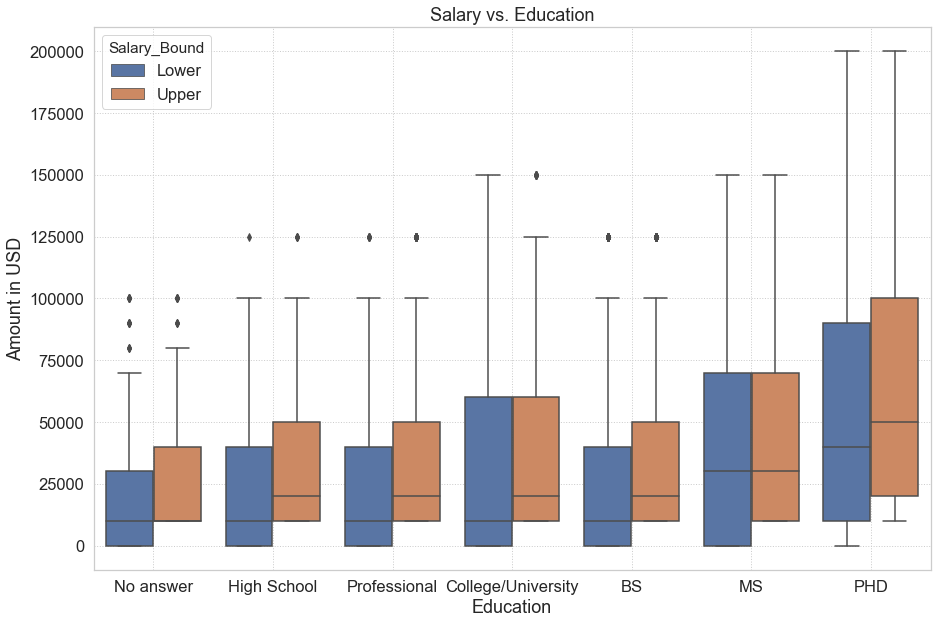

In [167]:
from functools import partial
def q1(x): return np.quantile(x, q=.25)
def q2(x): return np.quantile(x, q=.50)
def q3(x): return np.quantile(x, q=.75)
##data=df, group_col=target feature, 
def create_axes_if_needed(ax, **fig_kwargs):
    if ax is None:
        f = plt.figure(**fig_kwargs)
        ax = f.add_subplot(111)
    else:
        f = ax.figure
    return f, ax
def iqr_filter(data, group_col, salary_from='salary_from', salary_to='salary_to', var_name='Bound'):
    
    temp = {group_col: train[group_col],salary_from: train['Q10_Encoded'],salary_to:train['Q10_Encoded']}
    data = pd.DataFrame(data=temp)
    data[salary_from]=data[salary_from].apply(salaryrangefrom)
    data[salary_to]=data[salary_to].apply(salaryrangeto)
    
    data = data[~data[salary_to].map(np.isinf)]
    data = pd.melt(data, id_vars=[group_col], value_vars=[salary_from, salary_to], var_name=var_name)
    data[var_name] = data[var_name].map({salary_from: 'Lower', salary_to: 'Upper'})
    iqr = data.groupby([group_col, var_name]).aggregate(
        Q1=('value', q1),
        Q2=('value', q2),
        Q3=('value', q3),
    ).assign(
        IQR=lambda dataset: dataset['Q3'] - dataset['Q1'],
        IQR_lower=lambda dataset: dataset['Q1'] - 1.5*dataset['IQR'],
        IQR_upper=lambda dataset: dataset['Q3'] + 1.5*dataset['IQR']
    ).reset_index()
    joined = pd.merge(data, iqr, on=[group_col, var_name])
    return joined.query('IQR_lower <= value <= IQR_upper').reset_index()

def boxplot(data, group_col,xlabelname, var_name='Salary_Bound', title='Boxplot', figsize=(12, 8), text_wrap=None,ax=None):
    f, ax = create_axes_if_needed(ax, figsize=figsize)
    data = iqr_filter(data, group_col, var_name=var_name)[[group_col,var_name, 'value']]
    #labels=np.array['No answer','High School','Professional','College/University','BS','MS','PHD']
    #labels=list("ABCDEFGH")
    sns.boxplot(x=group_col, y='value', hue=var_name, data=data, ax=ax)
    ax.set_ylabel('Amount in USD')
    ax.set_xlabel(xlabelname)
    ax.grid(True, linestyle='dotted')
    

    ax.set_axisbelow(True)
    ax.set_title(title)
    if text_wrap is not None:
        ax.set_yticklabels([
            '\n'.join(textwrap.wrap(t.get_text(), width=text_wrap))
            for t in ax.get_yticklabels()])
    return ax

boxplot(data=train, group_col='Q4_education',xlabelname='Education',title='Salary vs. Education', figsize=(15, 10));
sorted_keys = {'No answer':0,'High School':1,'Professional':2,'College/University':3,'BS':4,'MS':5,'PHD':6}
plt.xticks(plt.xticks()[0], sorted_keys)

We see how the median salary tends to increase alongside with education level. So if a people have a higher education level, he is more likely to recive a higher salary. Moreover, the spread between the lowest and highest salaries is also growing. We could assume that not all higher education degrees are equal. Especially, if we talk about Ph.D. Could it be that degrees achieved at some universities are considered to be more "valuable" than in others? Or maybe this spread comes from the difference in salary levels of scientific workers in different countries? Do the thesis theme and research area have an effect? I don't try to address these questions in this assignment, but it is definitely an interesting topic for further analysis.

### S2.1.2 The Relationship Between  Salary And Age Level

Next, I'am going to create a similar plot but for age.

([<matplotlib.axis.XTick at 0x1a247ebcd0>,
 <a list of 11 Text xticklabel objects>)

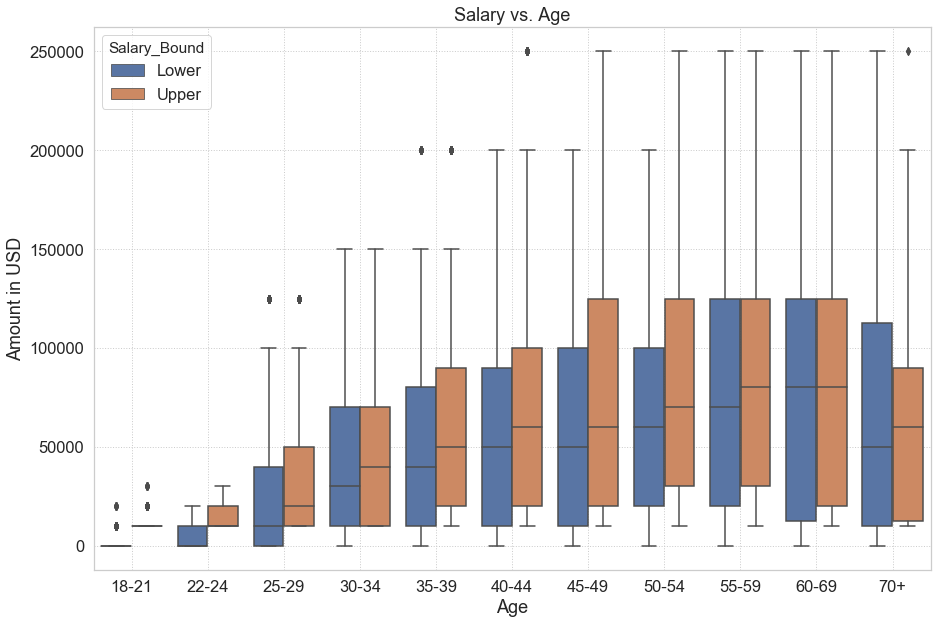

In [168]:
boxplot(data=train, group_col='Q1_age', xlabelname='Age',title='Salary vs. Age', figsize=(15, 10));
sorted_keys = {'18-21':19.0,'22-24':23.0,'25-29':27.0,'30-34':32.0,'35-39':37.0,'40-44':42.0,\
               '45-49':47.0,'50-54':52.0,'55-59':57.0,'60-69':64.0,'70+':70.0}
plt.xticks(plt.xticks()[0], sorted_keys)

We can see that the median salary increases with growth of age and reaches peak at 60-69 years old, then drops when people are 70 years old above. This is a expected result, since your experience, knowledge, ability and network also rise up with the growth of age, so it is possible to make more money. Besides, most people will retire after 70 years old,so for those elders the compensation is mainly composed of pension which may be not as much as salary in company. This can explain the reson why the median salary decreases in those who are 70 years old above.

### S2.1.3 The Relationship Between Salary And ML Level

In [169]:
salarymean={0:5000, 1:15000 , 2:25000 ,3:35000,4:45000,5:55000,6:65000,7:75000,\
            8:85000,9:95000,10:122500,11:125000,12:150000,13:225000,14:375000,}
def salaryrangemean(value):
    return salarymean[value]

([<matplotlib.axis.XTick at 0x1a23ade350>,
 <a list of 8 Text xticklabel objects>)

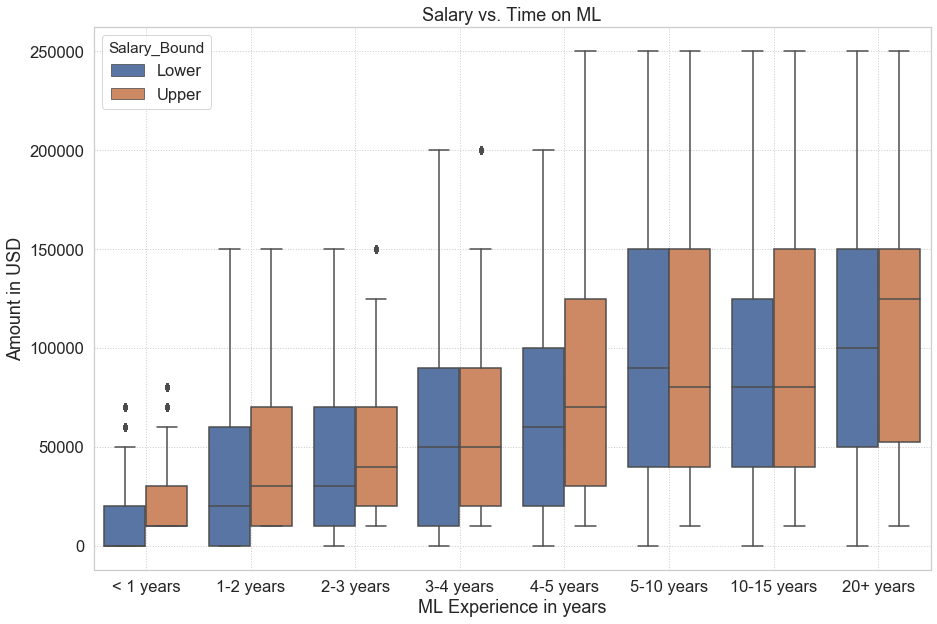

In [170]:
boxplot(data=train, group_col='Q23_timeonML',xlabelname='ML Experience in years',title='Salary vs. Time on ML', figsize=(15, 10));
sorted_keys = {'< 1 years':0,'1-2 years':1,'2-3 years':2,'3-4 years':3,'4-5 years':4,'5-10 years':7,\
               '10-15 years':12,'20+ years':20}
plt.xticks(plt.xticks()[0], sorted_keys)

The median salary rises up gradually with the time spending on machine leaning increasing, so the more time using machine learning the higher salary we could earn. 

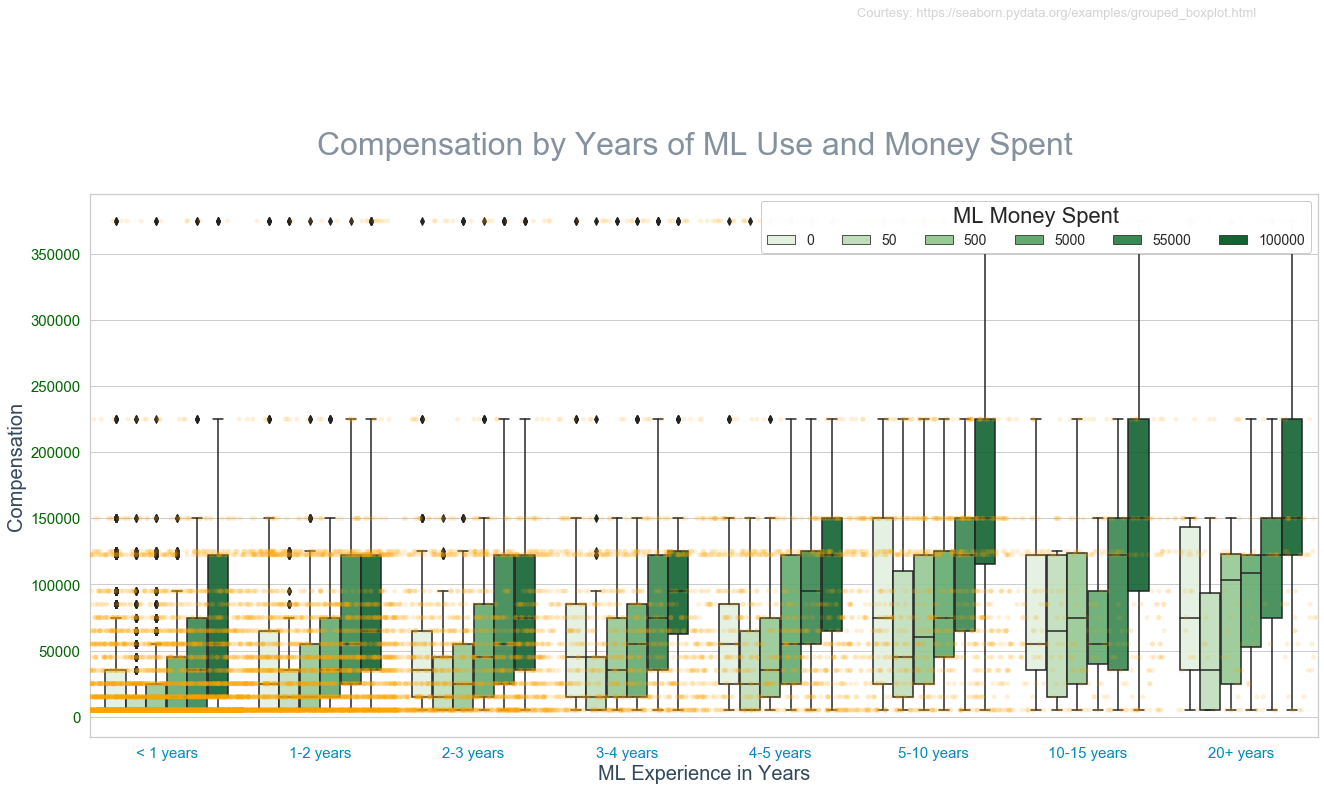

In [171]:
sns.set_style("whitegrid")
plt.figure(figsize=(22,10))

temp = {'Q23_timeonML': train['Q23_timeonML'],'Q11_moneyonML': train['Q11_moneyonML'],'Q10_Encoded':train['Q10_Encoded']}
dataS213=pd.DataFrame(data=temp)
dataS213['Q10_Encoded']=dataS213['Q10_Encoded'].apply(salaryrangemean)

ax = sns.boxplot(x="Q23_timeonML", y="Q10_Encoded", data=dataS213, hue='Q11_moneyonML',color='#666666', palette="Greens")

# Add transparency to colors
for patch in ax.artists:
    r, g, b, a = patch.get_facecolor()
    patch.set_facecolor((r, g, b, .9))
    
ax = sns.stripplot(x='Q23_timeonML', y='Q10_Encoded', data=dataS213, color="orange", jitter=0.5, size=5,alpha=0.15)

plt.title("Compensation by Years of ML Use and Money Spent  \n", loc="center",size=32,color='#34495E',alpha=0.6)
plt.xlabel('ML Experience in Years',color='#34495E',fontsize=20) 
plt.ylabel('Compensation',color='#34495E',fontsize=20)
plt.xticks(size=15,color='#008abc',rotation='horizontal', wrap=True)
plt.yticks(size=15,color='#006600')
plt.xticks(plt.xticks()[0], sorted_keys)
#plt.ylim(0,200)
plt.text(4.5, 530000, 'Courtesy: https://seaborn.pydata.org/examples/grouped_boxplot.html', fontsize=13,alpha=0.2)
plt.legend(loc="upper right",fontsize=14,ncol=7,title='ML Money Spent',title_fontsize=22,framealpha=0.99)
plt.show()

I also draw the realtionship between salary, ML experience and money spend on ML. There is an interesting phenomenon in each category of ML experience that the people who don't spend money on ML in the past 5 years still have possible to earn more money than those who spend less than $10000 on ML in the past 5 years. Except people who do not spend money on ML, people need to spend more money on ML if they want to increase their salary. But in salary prediction, the money spend on ML is not a good feature since it does not have a linear relationship with yearly salary.

## S2.2 Visualize the order of feature importance

Firstly, I am going to drop Q10 and Q10_buckets which has been encoded into Q10_encoded

In [172]:
salary_train=train.copy()
#train_to_drop = ['Q10','Q10_buckets','Time from Start to Finish (seconds)','Q3']
train_to_drop = ['Q10','Q10_buckets']
salary_train.drop(labels=train_to_drop, axis=1, inplace=True)

Now I am going to order the feature importance. I will use correlation matrix and pick 5 most correlated with salary. A correlation matrix is a table showing correlation coefficients between variables. Each cell in the table shows the correlation between two variables. This matrix is symmetrical, with the same correlation shown above the main diagonal being a mirror image of those below the main diagonal. The values range between 0 and 1.0. A correlation of 1.0 shows a perfect positive correlation. A correlation of 0.0 shows no linear relationship between the movement of the two variables.

In [173]:
#plt.figure(figsize=(200,200))
#sns.heatmap(salary_train.corr(),cmap='coolwarm',annot = True)
#plt.show()

Pick top 5 features correlated with yearly salary

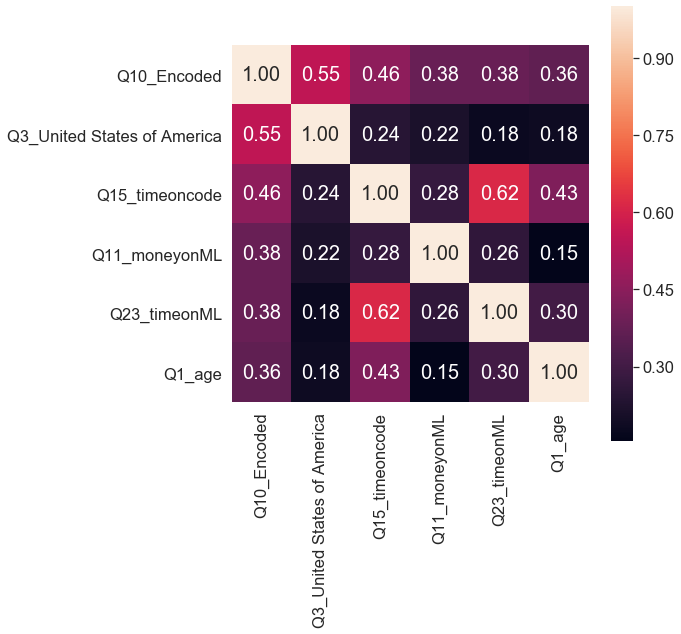

In [174]:
k = 6 #number of variables for heatmap
plt.figure(figsize=(8,8))
corrmat = salary_train.corr()
# picking the top 15 correlated features
cols = corrmat.nlargest(k, 'Q10_Encoded')['Q10_Encoded'].index
cm = np.corrcoef(train[cols].values.T)
sns.set(font_scale=1.5)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 20}, yticklabels=cols.values, xticklabels=cols.values)
bottom, top=hm.get_ylim()
hm.set_ylim(bottom+0.5,top-0.5)
plt.show()

From above correlation matrix, we can get top 5 most important features according to correlation with YearlyCompensation: 
**TOP 1**: Question 3 Are you Americans?**0.55**  
**TOP 2**: Question 15 "How long have you been writing code to analyze data (at work or at school)?"**0.46**  
**TOP 3**: Question 11 "Approximately how much money have you spent on machine learning and/or cloud computing products at your work in the past 5 years?"   **0.38**  
**TOP 4**: Question 23 "For how many years have you used machine learning methods?"  **0.38**   
**TOP 5**: Question 1 "What is your age (# years)?"  **0.36**   


## S3 Feature Selection

### S3.1 Explain How Feature Engineering Is A Useful Tool in Machine Learning

Data often exist in various forms such as image, text, graph, sequence, and time-series. A common way to represent data objects for data analytics is to use feature vectors. Data in raw forms such as special categorical feature mentioned above are not descried by informative features. Even data represented by feature vectors may still be in need of new effective features. Feature engineering is concerned with meeting the needs in generating and selecting an effective feature-vector based representation of data. Therefore, feature engineering can help us get better features. Finally better features can produce simpler and more flexible models, and they often yield better results.

### S3.2 Feature Selection Methods

In [175]:
X = salary_train.drop(['Q10_Encoded'],axis=1)
Y = salary_train['Q10_Encoded']
##
#from sklearn.model_selection import train_test_split
#X_Train, X_Test, Y_Train, Y_Test = train_test_split(X,Y,test_size=0.3, random_state=101)

Standardize features by removing the mean and scaling to unit variance

In [176]:
sc_X = StandardScaler()
sc_y = StandardScaler()
X_sc = sc_X.fit_transform(X)


I design a function which can implement four feature selection methods "Lasso-based feature selection","variable variance","Tree-based feature selection" and "L1-based feature selection". Due to computation complexity, I use SelectFromModel from sklearn.feature_selection to select features. The SelectFromModel has two selection methods, one is L1-based feature selection and the other is Tree-based feature selection, so I am going to choose the two methods to compare their performance on feature selection.

In [177]:
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LassoCV
from sklearn.svm import LinearSVC
from sklearn.decomposition import PCA
from sklearn.ensemble import ExtraTreesClassifier

def feature_selection(X_sele, Y_sele, method, par=None):
    if method not in ['lassocv','lsvc','pca','extra-trees','variance','extra-trees-2']:
        print("We don't support "+method+"Please choose from ['lassocv','lsvc','extra-trees','variance']")
        return X_sele
    else:
        if method=='lassocv':
            clf = LassoCV(cv=10)
            sfm = SelectFromModel(clf, threshold=0.15)
            sfm.fit(X_sele, Y_sele)
            X_sele_result = sfm.transform(X_sele)
            print(X_sele_result.shape[1])
            print(sfm.coef_)
            return pd.DataFrame(X_sele_result)
        elif method=='lsvc':
            Par = par if par else 0.01
            lsvc=LogisticRegression(C=Par,multi_class='auto', penalty="l1",dual=False)
            #lsvc = LinearSVC(C=0.1, penalty="l1", dual=False).fit(X_sele, Y_sele)
            model = SelectFromModel(lsvc, threshold="1.25*mean").fit(X_sele, Y_sele)
            #print(pd.DataFrame(model.estimator_.coef_))
            X_sele_result = model.transform(X_sele)
            print(X_sele_result.shape[1])
            return pd.DataFrame(X_sele_result)
        elif method=='extra-trees':
            sum_importance=0
            forest = ExtraTreesClassifier(n_estimators=250,random_state=0)
            forest.fit(X_sele, Y_sele)
            model = SelectFromModel(forest,threshold="1.25*mean",prefit=True)
            X_sele_result = model.transform(X_sele)
            print(X_sele_result.shape[1])
            
            #importances = forest.feature_importances_
            #std = np.std([tree.feature_importances_ for tree in forest.estimators_],axis=0)
            #indices = np.argsort(importances)[::-1]
            #print(indices[0])
            #dic_tree=dict()
            #Par = par if par else 42
            #for f in range(Par):
            #    dic_tree.setdefault(indices[f],X_sele[indices[f]])
            #    sum_importance+=importances[indices[f]]
            #print("Cumulative importance is %f" % (sum_importance))
            return pd.DataFrame(X_sele_result)
            #print(pd.DataFrame(dic_tree).shape[1])
            #return pd.DataFrame(dic_tree)
        elif method=='extra-trees-2':
            sum_importance=0
            forest = ExtraTreesClassifier(n_estimators=250,random_state=0)
            forest.fit(X_sele, Y_sele)
         
            importances = forest.feature_importances_
            std = np.std([tree.feature_importances_ for tree in forest.estimators_],axis=0)
            indices = np.argsort(importances)[::-1]
            #print(indices[0])
            dic_tree=dict()
            Par = par if par else 15
            for f in range(Par):
                dic_tree.setdefault(indices[f],X_sele[indices[f]])
                sum_importance+=importances[indices[f]]
                print(X.columns[indices[f]])
            print("Cumulative importance is %f" % (sum_importance))
            #return pd.DataFrame(X_sele_result)
            print(pd.DataFrame(dic_tree).shape[1])
            return pd.DataFrame(dic_tree)
        elif method=='variance':
            Par = par if par else (.008 * (1 - .008))
            sel = VarianceThreshold(threshold = Par).fit(X_sele)
            X_sele_result = model.transform(X_sele)
            return pd.DataFrame(X_sele_result)
        else:
            print("Please choose a method from ['lassocv','lsvc','pca','extra-trees','variance']")
            return X_sele
     

**Provide justification on why you select the set of features----L1-based feature selection"**

This method could return the non-zero coefficients from linear models penalized with L1 norm and here we choose SVM considering it has more flexibility in the choice of penalties and loss functions and better to scale large numbers of samples. It can help us to get an insight to the resulting coefficients of the features returned by SVM models to see which ones have a positive or negative relationship with the YearlyCompensation. By setting a threshold value, features whose importance is greater or equal are kept while the others are discarded.

In [178]:
X_VAR=feature_selection(X_sc, Y, 'lsvc')

42


When we set threshold value to 1.25 times the mean of importance values, L1-based feature selection method screens out 42 important features.

**Provide justification on why you select the set of features----Tree-based feature selection**

This method implements a meta estimator that fits a number of randomized decision trees (a.k.a. extra-trees) on various sub-samples of the dataset and uses averaging to improve the predictive accuracy and control over-fitting. This classifier can help us to see how much each variable is contributing to the tree decision. By setting a threshold value, features whose importance is greater or equal are kept while the others are discarded.

In [179]:
X_Tree=feature_selection(X_sc, Y, 'extra-trees')

99


We use the same criterion to set the threshold value, Tree-based feature selection method screens out 99 important features which is nearly two times greater than the number of selected features using L1-based feature selection. We can get a conclusion that L1-based feature selection is more preciser method than Tree-based feature selection. In S4 Model Implementation, We will compare their performance on classification using the two selected features bunches.

## S3.3 Dimensionality Reduction

Principal Component Analysis(PCA) tries to find the directions of most variation in the dataset. Since the resulting number of features is still very high in both two methods above, so I am going to use PCA to reduce the dimension of selected features. 

Text(0.5, 1.0, 'X_VAR')

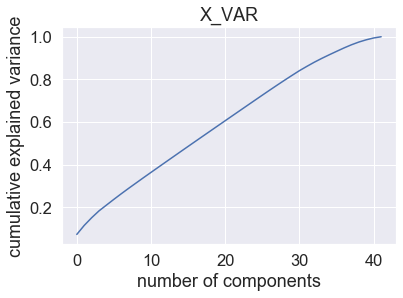

In [180]:
pca = PCA().fit(X_VAR)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');
plt.title('X_VAR')

The above figure shows how the cumulative explained variance changes with the number of components in X_VAR. I am going to choose 38 components to keep at least 90% variance.

In [181]:
pca_var= PCA(n_components=35).fit(X_VAR)
#X_sele_result = sel.transform(X_VAR)
print("The percentage of variance explained by the selected components is %f " % (pca_var.explained_variance_ratio_.sum()))
X_Var_PCA =pd.DataFrame(pca_var.transform(X_VAR))



The percentage of variance explained by the selected components is 0.915233 


Text(0.5, 1.0, 'X_Tree')

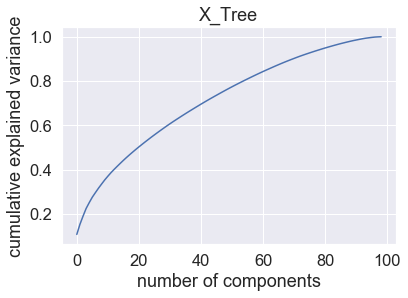

In [182]:
pca = PCA().fit(X_Tree)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');
plt.title('X_Tree')

I am going to choose 75 components to keep at least 90% variance.

In [183]:
pca_tree= PCA(n_components=75).fit(X_Tree)
#X_sele_result = sel.transform(X_VAR)
print("The percentage of variance explained by the selected components is %f " % (pca_tree.explained_variance_ratio_.sum()))
X_Tree_PCA =pd.DataFrame(pca_tree.transform(X_Tree))

The percentage of variance explained by the selected components is 0.921995 


## S4 Model Implementation

Now, Let us train and fit a logistic regression model to the training set using 10-fold cross-validation.

In [184]:
import warnings
#warnings.filterwarnings("ignore", category=ConvergenceWarning)
warnings.filterwarnings("ignore")

### S4.1 Average and Variance of Accuracy

In S3, We got two bunches of features named "X_Var_PCA" and "X_Tree_PCA". So here we respectively apply logistic regression algorithm on two kinds of features to choose the better feature bunch.

**Accuracy based on L1-based feature selection**

In [185]:
from sklearn.model_selection import KFold
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
def LogRe_cv(Model,cv,X_cv,Y_cv):
    target_names = ['0-9,999', '10,000-19,999', '20,000-29,999','30,000-39,999','40,000-49,999',\
                    '50,000-59,999','60,000-69,999','70,000-79,999','80,000-89,999','90,000-99,999',\
                    '100,000-124,999','125,000-149,999','150,000-199,999','200,000-249,999','>250,000']
    model_Log =Model
    kfold = KFold(n_splits=cv)
    kfold.get_n_splits(X_cv)

    accuracy = np.zeros(10)
    np_idx = 0
    
    for train_idx, test_idx in kfold.split(X_cv):
        X_train_sp, X_test_sp = X_cv.values[train_idx], X_cv.values[test_idx]
        y_train_sp, y_test_sp = Y.values[train_idx], Y.values[test_idx]
        
        model_Log.fit(X_train_sp, y_train_sp)
        predictions = model_Log.predict(X_test_sp) 
        
        report=classification_report(y_test_sp, predictions, target_names=target_names,output_dict=True)
        #print(report)
        ACC=accuracy_score(y_test_sp, predictions)
        accuracy[np_idx] = ACC*100
        
        #print(accuracy[np_idx])
        np_idx += 1
        print ("Fold {}: Accuracy: {}%".format(np_idx, round(ACC*100,2)) )   
    print ("Average Score: {}%({}%)".format(round(np.mean(accuracy),2), round(np.std(accuracy),2)))
    print(classification_report(y_test_sp, predictions, target_names=target_names))
    return report

    

In [186]:
model_Logvar = LogisticRegression(solver='lbfgs',multi_class='auto', penalty="l2",dual=False,max_iter=1200000)
report1=LogRe_cv(model_Logvar,10,X_Var_PCA,Y)

Fold 1: Accuracy: 30.56%
Fold 2: Accuracy: 36.0%
Fold 3: Accuracy: 33.92%
Fold 4: Accuracy: 34.72%
Fold 5: Accuracy: 35.12%
Fold 6: Accuracy: 40.48%
Fold 7: Accuracy: 36.48%
Fold 8: Accuracy: 39.95%
Fold 9: Accuracy: 43.96%
Fold 10: Accuracy: 43.8%
Average Score: 37.5%(4.17%)
                 precision    recall  f1-score   support

        0-9,999       0.51      0.94      0.66       512
  10,000-19,999       0.33      0.08      0.12       159
  20,000-29,999       0.46      0.12      0.19       106
  30,000-39,999       0.15      0.03      0.05        64
  40,000-49,999       0.17      0.09      0.12        53
  50,000-59,999       0.12      0.03      0.05        65
  60,000-69,999       0.24      0.14      0.18        63
  70,000-79,999       0.29      0.05      0.08        42
  80,000-89,999       0.00      0.00      0.00        41
  90,000-99,999       0.00      0.00      0.00        28
100,000-124,999       0.16      0.30      0.21        50
125,000-149,999       0.00      0.00  

**Accuracy based on Tree-based feature selection**

In [62]:
model_Logtree = LogisticRegression(solver='lbfgs',multi_class='auto', penalty="l2",dual=False,max_iter=1200000)
report2=LogRe_cv(model_Logvar,10,X_Tree_PCA,Y)

Fold 1: Accuracy: 28.08%
Fold 2: Accuracy: 32.72%
Fold 3: Accuracy: 31.36%
Fold 4: Accuracy: 31.76%
Fold 5: Accuracy: 32.88%
Fold 6: Accuracy: 36.0%
Fold 7: Accuracy: 34.48%
Fold 8: Accuracy: 38.43%
Fold 9: Accuracy: 42.99%
Fold 10: Accuracy: 41.23%
Average Score: 34.99%(4.44%)
                 precision    recall  f1-score   support

        0-9,999       0.49      0.95      0.65       512
  10,000-19,999       0.15      0.03      0.04       159
  20,000-29,999       0.07      0.02      0.03       106
  30,000-39,999       0.00      0.00      0.00        64
  40,000-49,999       0.11      0.04      0.06        53
  50,000-59,999       0.00      0.00      0.00        65
  60,000-69,999       0.14      0.03      0.05        63
  70,000-79,999       0.00      0.00      0.00        42
  80,000-89,999       0.25      0.02      0.04        41
  90,000-99,999       0.00      0.00      0.00        28
100,000-124,999       0.13      0.20      0.16        50
125,000-149,999       0.13      0.07

| Feature Selection Method | 10-fold Accuracy-Mean | 10-fold Accuracy-Variance |
| --- | --- | --- |
| L1-based feature selection | 37.5% | 4.17% |
| Tree-based feature selection | 34.95% | 4.61% |

From the table we can see that the mean and variance of accuracy are similiar in two bunches, but L1-based feature selection obtain a smaller size of feature bunch than Tree-based feature selectio. Therefore, it is obvious that L1-based feature selection is a better method.

### S4.2 Treating each value of hyperparameter(s) as a new model, and compair the performance

Remember that we use paramter C as our regularization parameter. Parameter C = 1/λ.  

**Lambda (λ)** controls the trade-off between allowing the model to increase it's complexity as much as it wants with trying to keep it simple. For example, if λ is very low or 0, the model will have enough power to increase it's complexity (overfit) by assigning big values to the weights for each parameter. If, in the other hand, we increase the value of λ, the model will tend to underfit, as the model will become too simple.  

Parameter **C** will work the other way around. **For small values of C**, we increase the regularization strength which will create simple models which **underfit the data**. **For big values of C**, we low the power of regularization which imples the model is allowed to increase it's complexity, and therefore, **overfit the data**.  



In [63]:
 def get_learning_curve_plot(estimator,X, y, ylim=None, cv=None, n_jobs=1,\
                        train_sizes=np.linspace(.1, 1.0, 10), scoring='accuracy'):
    #this function returns the learning plot of the model
    plt.figure(figsize=(10,6))
    #get learning curve
    train_sizes, train_scores, test_scores = learning_curve(estimator, X, y, cv=cv, scoring=scoring, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    #fill the range of the score
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,train_scores_mean + train_scores_std, alpha=0.1, color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,test_scores_mean + test_scores_std, alpha=0.1, color="g")
    #plot the score trend
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",label="The learning curve for the training set")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="The learning curve for the cross-validation set")
    plt.legend(loc="best")
    plt.grid()
    plt.ylim(0,1)
    plt.title('Logistic Regression Learning Curve with C='+ str(C))
    plt.xlabel("# of training data")
    plt.ylabel('Accuracy Score')
    return plt

**Bias-Variance trade off**
- **reference:**: https://www.dataquest.io/blog/learning-curves-machine-learning/
- **Bias:** If the training error is very low, it means that the training data is fitted very well by the estimated model. If the model fits the training data very well, it means it has low bias with respect to that set of data. If the training error is high, it means that the training data is not fitted well enough by the estimated model. If the model fails to fit the training data well, it means it has high bias with respect to that set of data.  
- **Variance:** A narrow gap indicates low variance. Generally, the more narrow the gap, the lower the variance. The opposite is also true: the wider the gap, the greater the variance.

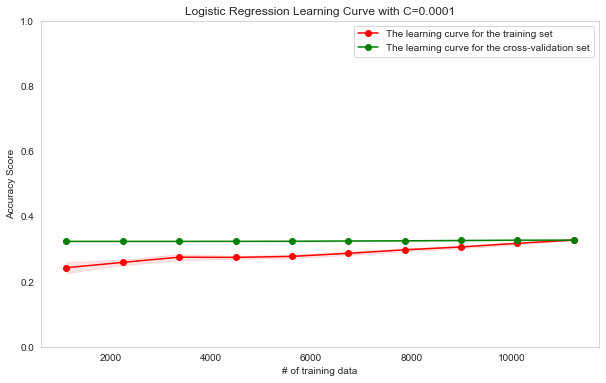

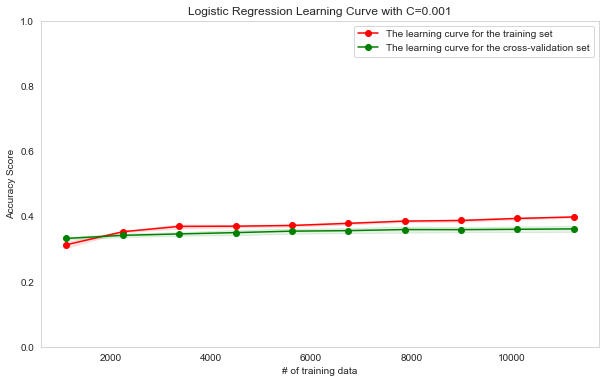

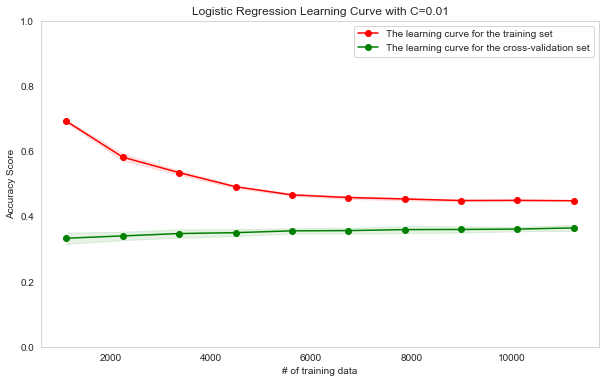

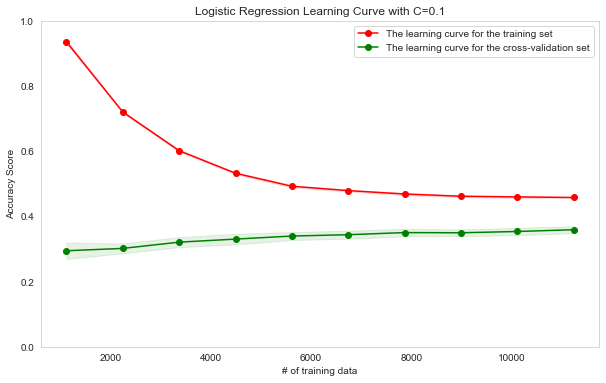

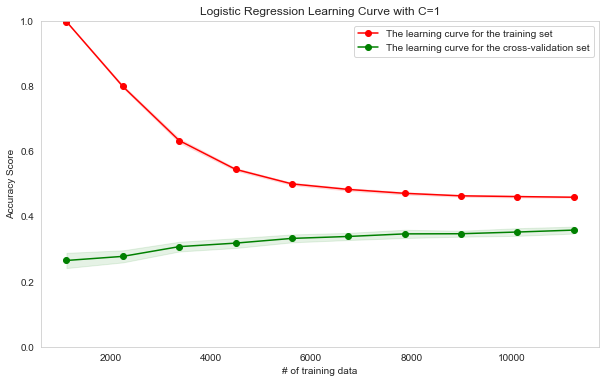

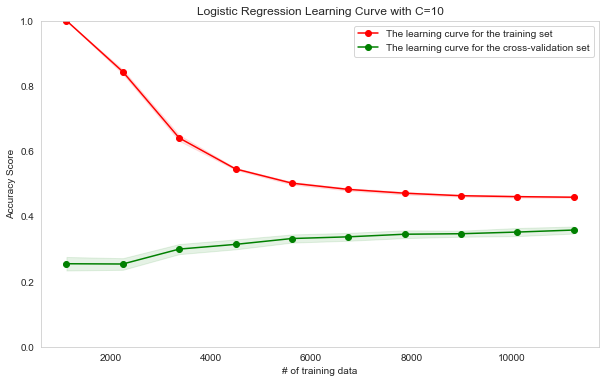

In [237]:
C_vals = [0.0001,0.001,0.01,0.1,1,10] #some different value of the C in logistic regression to try
for C in C_vals:
    logRe =LogisticRegression(solver='lbfgs',C=C, multi_class='auto', penalty="l2",dual=False)
    get_learning_curve_plot(logRe, X_sc, Y, cv=10)

When C is very small(C=0.0001), from the learning curve we can see that both training score and cross-validation score are pretty low when training set size is close to 0. While the size of training dataset is increasing, the cross-validation score does not change, but the training score increases gradually and finally catches up the cross-validation score. However, both scores are pretty low, so we have a high bias and low variance in this case. 

While with the C value going larger and larger, from the learning curve we can see that the training score gradually improves and test score slightly improves, however, the gap between the training score and test score become larger and larger, therfore we have a low bias and high variance compared with smaller C.  

Based on the figures above, the ideal C value should be somewhere in between **0.01 and 1**and finer tuning will be performed in the next section (using grid search).

### S4.3 Buckets Probability

We define a function that output is probability of belonging to each of the salary buckets.

In [105]:
def bucket_proba(X,y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.3)

    warnings.filterwarnings("ignore")
    model = LogisticRegression()    
    model.fit(X_train, y_train)

    predictions = model.predict(X_test)
    np_prob = (100 * model.predict_proba(X_test)).round(2)
    bucket_title = []
    for i in range(15):
        bucket_title.append("Bkt#"+str(i)+"%")
    df = pd.DataFrame(data=np_prob, columns = bucket_title)
    #df['y_pred'] = np.array(predictions)
    #df['y_true'] = np.array(y_test)
    return df

In [107]:
bucket_proba(X_sc,Y)

,Bkt#0%,Bkt#1%,Bkt#2%,Bkt#3%,Bkt#4%,Bkt#5%,Bkt#6%,Bkt#7%,Bkt#8%,Bkt#9%,Bkt#10%,Bkt#11%,Bkt#12%,Bkt#13%,Bkt#14%
0,45.19,10.43,10.24,13.54,2.82,1.72,5.23,1.29,0.09,0.10,4.75,2.44,0.15,2.00,0.00
1,64.19,26.22,4.78,1.22,0.10,2.98,0.05,0.06,0.28,0.02,0.03,0.03,0.04,0.00,0.01
2,0.54,1.43,0.60,2.93,5.38,16.88,12.53,1.73,2.84,3.91,4.27,2.77,5.59,0.29,38.32
3,26.25,3.80,1.49,3.55,3.22,8.31,3.06,9.82,5.72,7.05,14.25,10.06,3.11,0.31,0.02
4,37.35,8.58,25.82,5.33,11.32,3.35,2.16,3.22,0.29,0.02,2.36,0.19,0.02,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3745,77.32,8.36,3.48,0.39,1.68,0.68,0.47,5.08,0.00,0.02,0.46,0.51,0.06,0.00,1.51
3746,76.31,14.10,0.75,6.05,0.84,0.73,0.09,0.15,0.10,0.02,0.38,0.03,0.24,0.20,0.00
3747,65.48,9.73,8.39,2.72,3.32,4.60,1.43,0.85,0.04,1.48,1.23,0.02,0.25,0.00,0.46
3748,21.95,28.38,19.71,10.36,2.94,4.06,2.51,3.09,0.62,0.92,3.62,0.15,1.03,0.64,0.00


The above table shows the probability of belonging to each of the salary buckets. For example, at the first row, the probability of belonging to salary bucket 1 is 45.19%.

## S5 Model tuning

### S5.1 Hyperparameter Tuning

In this session, We will use grid search to obtain a ideal C from 0.01 to 1 

In [64]:
X_train, X_test, Y_train, Y_test = train_test_split(X_VAR, Y, test_size=0.3, random_state=80)

In [127]:
from math import log
steps_c=np.array([0.001,0.01,0.05,0.1,0.5,1,1.5,2,5,7,8,9,10,50,100,200,500,1000,1500,2000,2500,3000,4500,5000,5500,10000])

trainErrC = np.zeros(steps_c.shape)
testErrC = np.zeros(steps_c.shape)
def tunec(steps_c):
    trainErrC = np.zeros(steps_c.shape)
    testErrC = np.zeros(steps_c.shape)
    for i, step in enumerate(steps_c):
        # Create model instance
        model_c_tune=LogisticRegression(solver='saga', C=step, multi_class='auto',penalty="l1",dual=False)
        # Train model
        model_c_tune.fit(X_train, Y_train)
    
        # Make Predictions
        y_train_pred = model_c_tune.predict(X_train)
        y_test_pred = model_c_tune.predict(X_test)
    
        y_train_pred=y_train_pred.reshape(-1,1)
        y_test_pred=y_test_pred.reshape(-1,1)
    
        # Calculate Error
        #ACC_train=accuracy_score(y_test_sp, predictions)
        
        ACC_train=accuracy_score(Y_train, y_train_pred)
        ACC_test=accuracy_score(Y_test, y_test_pred)
        
        trainErrC[i] = ACC_train
        testErrC[i] =  ACC_test

    
    print("finish")
    plt.figure(figsize=(12,5))
    plt.plot(np.log(steps_c),trainErrC,'r',label='Training Set')
    plt.plot(np.log(steps_c),testErrC,'g',label='Test Set')


    plt.title("C Tuning")
    plt.xlabel("Log(C)")
    plt.ylabel("Accuracy score")
    plt.legend(loc=1)


We choose different C ranging from 0.01 to 1 to calculate the training accuracy score and testing accuracy score, the results are shown in the following figure. The highest accuracy score is 0.367 and the ideal C is 0.42 

In the sklearn.linear_model.LogisticRegression, there are several parameters which can be tuned to get a better performance, including 'solver','penalty' and 'C'. Therefore we design some combination to get the best parameters using GridSearchCV.  

**C**: 200 values evenly range from 0.01 to 1  
**solver**: 'lbfgs', 'liblinear', 'sag', 'saga', 'newton-cg'  
**penalty**: 'l1','l2' 

In [98]:
from sklearn.model_selection import GridSearchCV

param_grid = [
  {'penalty': ['l1'], 'solver': [ 'lbfgs', 'liblinear', 'sag', 'saga']},
  {'penalty': ['l2'], 'solver': ['newton-cg']},
 ]
params=[
    {'penalty': ['l1'], 'solver': [ 'liblinear', 'saga'],'C':np.arange(0.01,1,0.005),},
    {'penalty': ['l2'], 'solver': ['newton-cg', 'sag','lbfgs','liblinear' ],'C':np.arange(0.01,1,0.005),},
]


#Linear regression model
Logre = LogisticRegression()
#grid search engine
gridLogre = GridSearchCV(estimator = Logre, param_grid = params, scoring = 'accuracy')
#select best logisticregression model
best_par = gridLogre.fit(X_train, Y_train)
#best parameter results for grid search
print("Best hyperparameters:\n",best_par.best_params_)
print("Best score:\n",best_par.best_score_)

Best hyperparameters:
 {'C': 0.3, 'penalty': 'l1', 'solver': 'saga'}
Best score:
 0.37292786098090774


## S5.2 Performance Compareation (Accuracy)

Now I am going to compare the performance bwtween logistic regression model with ideal C and default C.

In [99]:
#defaultModel
defaultCModel = LogisticRegression()
defaultCModel.fit(X_train, Y_train)
y_test_pred = defaultCModel.predict(X_test)
defaultModel_accuracy=accuracy_score(Y_test, y_test_pred)

#bestModel
bestModel = LogisticRegression(solver='saga', C=0.3, multi_class='auto',penalty="l1",dual=False)
bestModel.fit(X_train, Y_train)
y_test_pred = bestModel.predict(X_test)
bestModel_accuracy=accuracy_score(Y_test, y_test_pred)


In [100]:
print("Default Model:")
print("Accuracy={}%".format(round(defaultModel_accuracy*100,3))) 
print("Best Model:")
print("Accuracy={}%".format(round(bestModel_accuracy*100,3))) 
print("Optimal model has", str(round(((bestModel_accuracy-defaultModel_accuracy)/defaultModel_accuracy)*100,2))+"%", "better performance than default model in terms of Accuracy")

Default Model:
Accuracy=36.347%
Best Model:
Accuracy=37.093%
Optimal model has 2.05% better performance than default model in terms of Accuracy


## S6 Testing & Discussion

### S6.1 Accuracy on the test sample 

In [101]:
bestModel = LogisticRegression(solver='saga', C=0.3, multi_class='auto',penalty="l1",dual=False)
bestModel.fit(X_train, Y_train)
y_test_pred = bestModel.predict(X_test)
bestModel_test_accuracy=accuracy_score(Y_test, y_test_pred)
bestModel_test_precision=precision_score(Y_test, y_test_pred,average='weighted')
bestModel_test_recall=recall_score(Y_test, y_test_pred,average='weighted')
bestModel_test_f1=f1_score(Y_test, y_test_pred,average='weighted')


In [102]:
#print("Best Model with {}".format(best_par.best_params_))
print("Accuracy on test dataset={}%\nPrecision on testing dataset={}%\nRecall= on testing dataset={}%\nF1= on testing dataset={}".\
      format(round(bestModel_test_accuracy*100,3),round(bestModel_test_precision*100,3),\
             round(bestModel_test_recall*100,3),round(bestModel_test_f1,3)))


Accuracy on test dataset=37.093%
Precision on testing dataset=29.166%
Recall= on testing dataset=37.093%
F1= on testing dataset=0.289


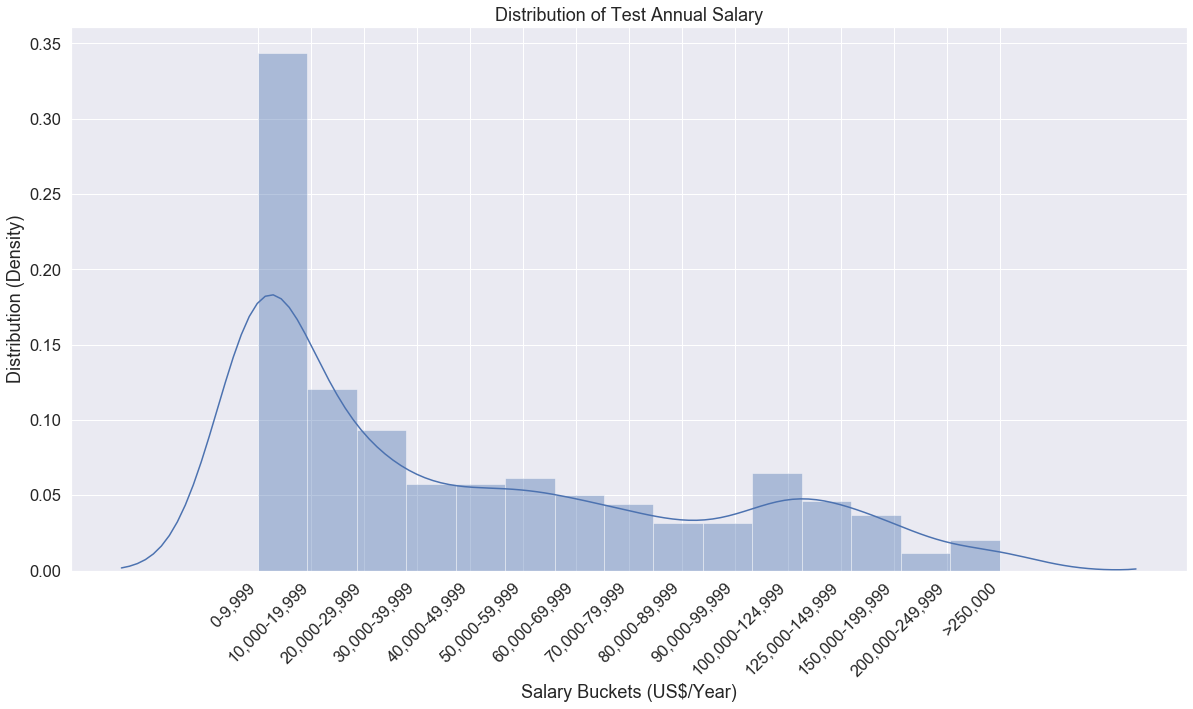

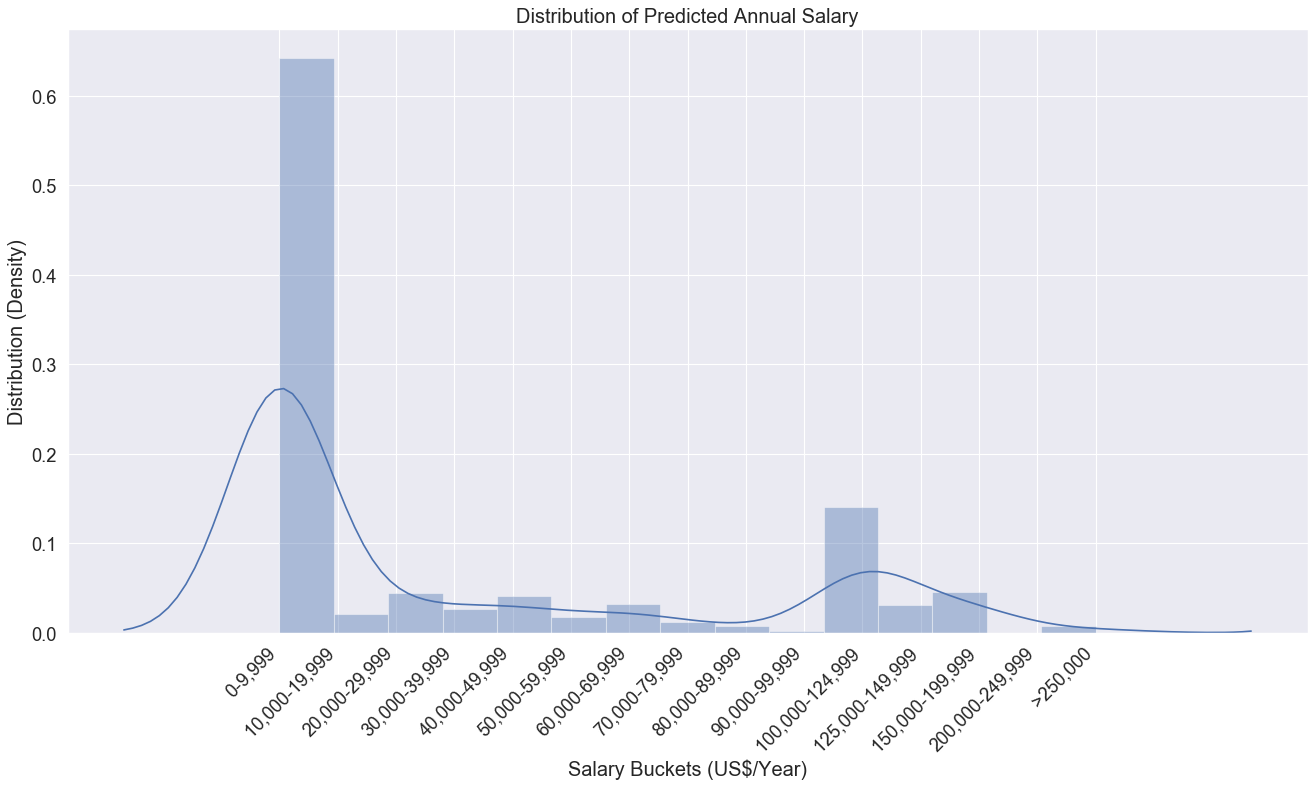

In [107]:
sorted_keys = {'0-9,999':0,'10,000-19,999':1,'20,000-29,999':2,'30,000-39,999':3,'40,000-49,999':4,'50,000-59,999':5,\
               '60,000-69,999':6,'70,000-79,999':7,'80,000-89,999':8,'90,000-99,999':9,'100,000-124,999':10,\
               '125,000-149,999':11,'150,000-199,999':12,'200,000-249,999':13,'>250,000':14}

plt.figure(num=None, figsize=(20, 10), facecolor='w', edgecolor='k')
fig = sns.distplot(Y_test,hist=True,bins=15,norm_hist=True)
fig.set_xticks(range(0,15))
plt.xticks(plt.xticks()[0], sorted_keys)
plt.xticks(rotation=45, ha="right" )
plt.xlabel("Salary Buckets (US$/Year)")
plt.ylabel("Distribution (Density)")
plt.grid(True)
plt.title("Distribution of Test Annual Salary") 
plt.show()

plt.figure(num=None, figsize=(20, 10), dpi=80, facecolor='w', edgecolor='k')
fig = sns.distplot(y_test_pred,hist=True,bins=15,norm_hist=True)
fig.set_xticks(range(0,15))
locs, labels = plt.xticks()
plt.xticks(plt.xticks()[0], sorted_keys)
plt.xticks(rotation=45, ha="right" )
plt.xlabel("Salary Buckets (US$/Year)")
plt.ylabel("Distribution (Density)")
plt.grid(True)
plt.title("Distribution of Predicted Annual Salary") 
plt.show()

### S6.2 The Test Set vs. The Training Set

In [187]:
bestModel = LogisticRegression(solver='saga', C=0.3, multi_class='auto',penalty="l1",dual=False)
bestModel.fit(X_train, Y_train)
y_train_pred = bestModel.predict(X_train)
bestModel_train_accuracy=accuracy_score(Y_train, y_train_pred)
bestModel_train_precision=precision_score(Y_train, y_train_pred, average='weighted')
bestModel_train_recall=recall_score(Y_train, y_train_pred, average='weighted')
bestModel_train_f1=f1_score(Y_train, y_train_pred, average='weighted')

In [110]:
#print("Best Model with {}".format(best_par.best_params_))
print("Accuracy on training dataset={}%\nPrecision on training dataset={}%\nRecall= on training dataset={}%\nF1= on training dataset={}".\
      format(round(bestModel_train_accuracy*100,3),round(bestModel_train_precision*100,3),\
             round(bestModel_train_recall*100,3),round(bestModel_train_f1,3)))

Accuracy on training dataset=39.168%
Precision on training dataset=33.203%
Recall= on training dataset=39.168%
F1= on training dataset=0.315


| Dataset | Accuracy | Precision | Recall | F1 |
| --- | --- | --- | --- | --- |
| Training Set | 39.168% | 33.203% | 39.168% | 0.315 |
| Test Set | 37.093% | 29.166% | 37.093% | 0.289 |

From above table, we can see that training set has a better performane than test set on accuracy score, precision score, recall score and f1 score.

### S6.3 How to Increase the Accuracy (Test, Training)

- As shown in table in S6.2, although we have choosen best parameters for logistic regression model, our accuracy scores on both training set and test set are still under 40%, which means that the logistic regression model could not catch enough details of our dataset and could not fit it very well. Therefore, our model is underfitting. Could we improve the accuracy score on training set by increasing hypterparameter C to make our model overfitting? To answer the question, I plot the following the figure which shows the change of accuracy score with C. As we seen in the figure, even if the C is larger than 10,000, the accuracy of training set don't improve dramatically. So we can get a conclusion that the logistic regression model is not suitable for our dataset, although we could increase C to slightly improve the accuracy of test set and training set, the score is still pretty low since our model is underfitting.  
- Why does not the logistic regression model fit our dataset well? It is possible that only small part of salary buckets could be separated linearly. From the distribution of predicted annual salary buckets in S6.2, we can see that 0-9,999 and 100,000-124,999 have a higher probability than other buckets and the left buckets have a even probability except for 90,000-99,999 and 200,000-249,999 that have a about zero probability. Therefore, 0-9,999 and other buckets can be separated linearly, but the other buckets are possible to be mixed up.  
- We might get a better accuracy score if we use SVM algorithm to classify salary buckets. Because we could change choose a kernal of SVM to transform the dataset into a higher feature dimensional space to make it possible to perform linear seperation.

finish


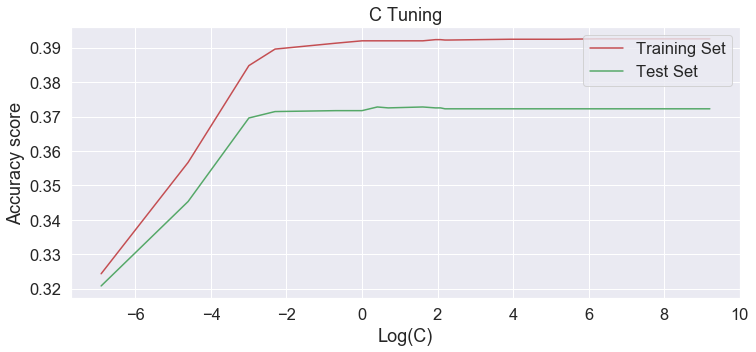

In [128]:
tunec(steps_c)